In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("X_train original shape", train_images.shape)
print("y_train original shape", train_labels.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


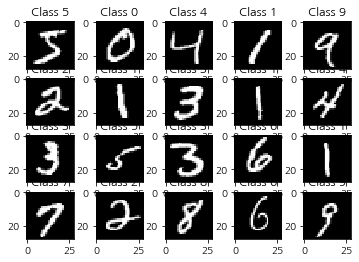

In [3]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(train_labels[i]))

In [4]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
print("Training matrix shape", train_images.shape)
print("Testing matrix shape", test_images.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
train_labels = to_categorical(train_labels, nb_classes)
test_labels = to_categorical(test_labels, nb_classes)

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [8]:
#model.fit(X_train, Y_train,
#          batch_size=128, epochs=4, verbose=1,
#          validation_data=(X_test, Y_test))
model.fit(train_images, train_labels, batch_size=128, epochs=4, verbose=2)

Epoch 1/4


InternalError:  Blas GEMM launch failed : a.shape=(128, 784), b.shape=(784, 512), m=128, n=512, k=784
	 [[node dense_1/MatMul (defined at C:\Users\go2th\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_1178]

Function call stack:
keras_scratch_graph


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels,
                       verbose=1)
print('test_acc: ',test_acc)